<a href="https://colab.research.google.com/github/GenevaKirwan/CFG-Airline-Project/blob/Project-Working-Branch/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Environmental & Economical Impact of USA’s Airlines
## Data Analysis Project Final Code

The code within this document should be run and reviewed in conjuction with the accompanying report. The code below is split into three sections of analysis: Emissions, Fleet, Revenue and Ticket price. Together these sections will provide a comprehensive picture of the environmental and Economic Impact of 10 US Airlines.


## Emissions: 

## Fleet: Analysis of the Fleet Portfolio as it Relates to Emissions

### Fleet: Introduction to Section

Within this section fleet data has been analysed for the airlines within the scope of this project. The data has been reformatted, cleansed and visualised in parallel with the emissions data to see what impact fleet characteristics (size, capacity, age and model) has on total annual emissions and to identify which tenents make up a low-emission airline.

Within this section, the pandas and matplotlib libraries have been used to allow for dataframe generation and manipulation as well as visualisation in the form of scatterplots, nested pie charts and histograms.

### Fleet: Initial Data Source

Inventory Data for each of the 10 selected airlines has been downloaded from the Bureau of Transportation Statistics website as a csv file. This data included information about each aircraft owned by American based airlines.

When importing the data into a pandas dataframe, only the columns related to the analysis have been retained, this minimises the space complexity of the code.

In [1]:
import pandas as pd
req_col = ['CARRIER', 'CARRIER_NAME', 'OPERATING_STATUS', 'MANUFACTURER','MODEL', 'CAPACITY_IN_POUNDS', 'MANUFACTURE_YEAR']
BTS_fleet_pd = pd.read_csv('1053933928_T_F41SCHEDULE_B43.csv', usecols= req_col)
BTS_fleet_pd      

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS
0,0WQ,Avjet Corporation,2002,Y,Boeing,BBJ7377EG,171000
1,0WQ,Avjet Corporation,2006,Y,Bombardier,GlobalExpress,96000
2,0WQ,Avjet Corporation,2007,Y,Bombardier,GlobalExpress,99500
3,0WQ,Avjet Corporation,2014,Y,Dassault-Falcon-2000EXEASy,DASSAULT-FALCON-2000,90700
4,0WQ,Avjet Corporation,2000,Y,Gulfstream,GA-IV-IV,74600
...,...,...,...,...,...,...,...
7690,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972
7691,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972
7692,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972
7693,ZW,Air Wisconsin Airlines Corp,2004,Y,Bombardier,CL65,12972


### Fleet: Data Cleansing and Transforming

With the overwhelming amount of data provided for each individual aircraft it is difficult to analyse the fleet fingerprint. To make this data more manageable and enhance the data quality, data cleansing was carried out. Removal of redundant data and duplication as well as standardisation for the manufacturers columns has been carried out.

#### Removing Redundant data

The rows which contained non-operating planes or airlines beyond the scope of this project have been removed, resulting in a significantly smaller dataframe.

In [2]:
airlines_list ='Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'Frontier Airlines Inc.','Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines', 'United Air Lines Inc.'
BTS_fleet_pd = BTS_fleet_pd[(BTS_fleet_pd.CARRIER_NAME.isin(airlines_list)) & (BTS_fleet_pd.OPERATING_STATUS == 'Y')]
BTS_fleet_pd

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS
750,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
751,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
752,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
753,AA,American Airlines Inc.,1999,Y,Airbus,A320-232,38500
754,AA,American Airlines Inc.,2014,Y,Boeing,B737-823,40800
...,...,...,...,...,...,...,...
7224,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421
7225,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421
7226,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421
7227,WN,Southwest Airlines Co.,2020,Y,THEBOEINGCO,B-737-8,48421


#### Standardising Manufacturer Names

To check the current extent of standardisation, the manufacturers currently included in the dataset will be viewed. As can be seen below many of the manufacturers have been listed with varying names, this will make it difficult when visualising the data later.

In [3]:
man_ls = []

for model in BTS_fleet_pd['MANUFACTURER']:
    if model not in man_ls:
        man_ls.append(model)
print(man_ls)

['Airbus', 'Boeing', 'TheBoeingCompany', 'AirbusCompany', 'Embraer', 'AirbusIndustrie', 'BOEINGCOMPANY', 'AirbusIndustries', 'Bombardier', 'BoeingCo', 'THEBOEINGCO']


The manufacturer names have been standardised below and the resulting dataframe has been reindexed

In [4]:
import pandas as pd

BTS_fleet_pd.replace(to_replace =["Airbus", "AirbusCompany", "AirbusIndustrie", "AirbusIndustries"], 
                            value ="AIRBUS", inplace = True)
BTS_fleet_pd.replace(to_replace =["Boeing", "TheBoeingCompany", "BOEINGCOMPANY", "THEBOEINGCO", "BoeingCo"], 
                            value ="BOEING", inplace = True)
BTS_fleet_pd.replace(to_replace =["Embraer"], 
                            value ="EMBRAER", inplace = True)
BTS_fleet_pd.replace(to_replace =["Bombardier"], 
                            value ="BOMBARDIER", inplace = True)
BTS_fleet_pd.reset_index(drop = True)

D:\Jupyter\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS
0,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
1,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
2,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
3,AA,American Airlines Inc.,1999,Y,AIRBUS,A320-232,38500
4,AA,American Airlines Inc.,2014,Y,BOEING,B737-823,40800
...,...,...,...,...,...,...,...
4465,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421
4466,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421
4467,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421
4468,WN,Southwest Airlines Co.,2020,Y,BOEING,B-737-8,48421


This data frame is then saved as a csv. This version of the data will be useful for visualising the capacity and manufacturer year distributions later

In [5]:
from datetime import date
today = date.today()
file_name = 'BTS_fleet' + today.strftime("%d%m%y") + '.csv'
BTS_fleet_pd.to_csv(file_name)

#### Removing Duplicates

Whilst the full dataset will be useful when analysing capacity and nanufacturer year, when analysisng the fleet model distribution these variabled complicate the data set. Resultantly, duplicate model listings have been summed to make visualisation easier later. Currently within the dataset every individual aircraft is listed.

In [6]:
BTS_fleetsize_pd = BTS_fleet_pd.groupby(BTS_fleet_pd.columns.tolist(),as_index=False).size()
BTS_fleetsize_pd.rename(columns={"size": "NO. AIRCRAFTS"}, inplace = True)
BTS_fleetsize_pd

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS,NO. AIRCRAFTS
0,AA,American Airlines Inc.,1997,Y,AIRBUS,A320-232,38500,1
1,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-112,35000,6
2,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-132,36700,3
3,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-214,37200,1
4,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-232,38500,3
...,...,...,...,...,...,...,...,...
551,WN,Southwest Airlines Co.,2017,Y,BOEING,B-737-8H4,43800,39
552,WN,Southwest Airlines Co.,2018,Y,BOEING,B-737-8,48421,17
553,WN,Southwest Airlines Co.,2018,Y,BOEING,B-737-8H4,43800,26
554,WN,Southwest Airlines Co.,2019,Y,BOEING,B-737-8,48421,3


To check that we now have no duplicate entries the data set for just one of the airlines will be reviewed: American Airlines

In [7]:
just_american = BTS_fleetsize_pd[BTS_fleetsize_pd.CARRIER == 'AA']
just_american

,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,OPERATING_STATUS,MANUFACTURER,MODEL,CAPACITY_IN_POUNDS,NO. AIRCRAFTS
0,AA,American Airlines Inc.,1997,Y,AIRBUS,A320-232,38500,1
1,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-112,35000,6
2,AA,American Airlines Inc.,1998,Y,AIRBUS,A319-132,36700,3
3,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-214,37200,1
4,AA,American Airlines Inc.,1998,Y,AIRBUS,A320-232,38500,3
...,...,...,...,...,...,...,...,...
87,AA,American Airlines Inc.,2019,Y,BOEING,B737-800MAX,42900,6
88,AA,American Airlines Inc.,2019,Y,BOEING,B787-9,84600,2
89,AA,American Airlines Inc.,2020,Y,AIRBUS,A321-253NX,52200,16
90,AA,American Airlines Inc.,2020,Y,BOEING,B737-800MAX,42900,8


Based on reviewing the data for American Airlines, it is evident that some of the plane models can have different capacities. To simplify this data we need to focus on the model and sum up the number of aircrafts per model.

In [8]:
BTS_model_pd = BTS_fleetsize_pd.groupby(['CARRIER','CARRIER_NAME','MANUFACTURER','MODEL'], as_index = False)[["NO. AIRCRAFTS"]].sum()
BTS_model_pd

,CARRIER,CARRIER_NAME,MANUFACTURER,MODEL,NO. AIRCRAFTS
0,AA,American Airlines Inc.,AIRBUS,A319-112,62
1,AA,American Airlines Inc.,AIRBUS,A319-115,32
2,AA,American Airlines Inc.,AIRBUS,A319-132,39
3,AA,American Airlines Inc.,AIRBUS,A320-214,22
4,AA,American Airlines Inc.,AIRBUS,A320-232,26
...,...,...,...,...,...
105,WN,Southwest Airlines Co.,BOEING,B-737-7K9,4
106,WN,Southwest Airlines Co.,BOEING,B-737-7L9,5
107,WN,Southwest Airlines Co.,BOEING,B-737-7Q8,19
108,WN,Southwest Airlines Co.,BOEING,B-737-8,41


This refined data set has been saved.

In [9]:
from datetime import date
today = date.today()
file_name = 'BTS_models' + today.strftime("%d%m%y") + '.csv'
BTS_fleetsize_pd.to_csv(file_name)

### Fleet: Data Visualisation

#### Fleet Models Pie Chart

A key aspect of the analysis to be carried out is an appreciation of the type of aircraft each airline has. It is possible there may be a correlation between the make of aircraft and the total emmissions. The method for visualising this aspect of the data set will be pie charts as the model data is categorical.

A function for creating nested pie charts has been written below. Within the pie chart the outer ring shows the aircraft manufacturer with the inner ring showing individual aircraft models. As there are many different models this approach was considered useful to make a diagram which was more human readable. Much of the complexity of the function is due to the color mapping process.

A qualitative color map (Tab20c) was used to colour each wedge in the pie chart. However, as this colour map only contained 4 distinct hues for each colour further work was required to repeat hues the appropriate number of times within the graph. Additionally consideration was required when assigning a matching coulour for the outer wedge in the pie chart. The result of the care taken in the colour picking process is that it is easy to see which models relate to which manufacturer. The parts of the code associated with the color mapping process start with the comment 'Color Picking'.

The nested pie chart was then created using wedgeprops to set both the inner and outer rings.

<function matplotlib.pyplot.show(close=None, block=None)>

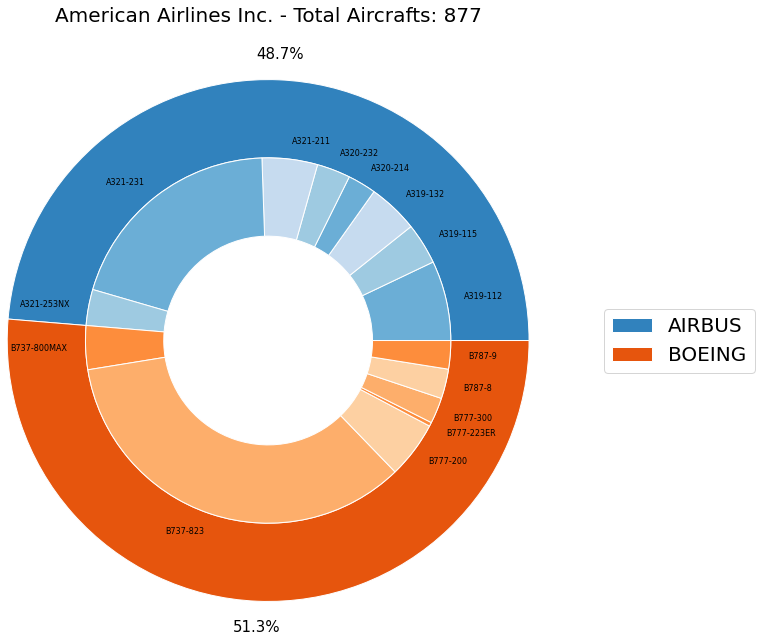

In [10]:
import matplotlib.pyplot as plt
#import numpy as np

def fleet_pie (carr):
    carrier_pd = BTS_model_pd[BTS_model_pd.CARRIER == carr]
    name = carrier_pd['CARRIER_NAME'].iloc[0] + ' - Total Aircrafts: ' + str(carrier_pd['NO. AIRCRAFTS'].sum())
    size = 0.9

    fig, ax = plt.subplots()
    
    ##Color Picking
    airbus_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='AIRBUS')])
    boeing_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='BOEING')])
    bombardier_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='BOMBARDIER')])
    embraer_no = len(carrier_pd[(carrier_pd['MANUFACTURER']=='EMBRAER')])


    blues = [1, 2, 3]* 5
    oranges = [5, 6, 7]* 5
    purples = [13, 14, 15]* 5
    greens = [9, 10, 11]* 5

    airbus_col = blues[0: airbus_no]
    boeing_col = oranges[0:boeing_no]
    bombardier_col = purples[0:bombardier_no]
    embraer_col = greens[0: embraer_no]

    col_ls = [airbus_col, boeing_col, bombardier_col, embraer_col]

    outer_cols = []

    for ls in col_ls:
        if ls:
            outer_cols.append((ls[0]//4)*4)

    inner_cols = airbus_col + boeing_col + bombardier_col + embraer_col

    cmap = plt.cm.get_cmap('tab20c')
    outer_colors = cmap(outer_cols)
    inner_colors = cmap(inner_cols)
    
    #Making Labels
    
    manufacturer_labels = []

    for man in carrier_pd['MANUFACTURER']:
        if man not in manufacturer_labels:
            manufacturer_labels.append(man)
    
    model_labels = []

    for mod in carrier_pd['MODEL']:
        if mod not in model_labels:
            model_labels.append(mod)
    
    #Pie Chart Generating
    
    ax.pie(carrier_pd.groupby('MANUFACTURER')["NO. AIRCRAFTS"].sum(), radius=3, autopct='%1.1f%%', colors = outer_colors, 
           wedgeprops=dict(width=size, edgecolor='w'), textprops={'color':"k", 'fontsize':15}, pctdistance = 1.1)
    ax.legend(manufacturer_labels,
          loc="center left",
          bbox_to_anchor=(2, 0, 0.5, 1), prop={"size":20})

    ax.pie(carrier_pd['NO. AIRCRAFTS'], radius=3-size, colors = inner_colors, labels = model_labels,textprops={'color':"k", 'fontsize':8},
           wedgeprops=dict(width=size, edgecolor='w'))
    
    plt.title(name, pad=210, fontsize=20)

    ax.set(aspect="equal")
    return (plt.show)
fleet_pie('AA')

#### Fleet Characteristics Distribution Histograms

In addition to the analysis of the fleet models, fleet capacity and age are also useful variables to consider when reviewing how the fleet impacts the airline emmissions. As this is numerical data, the distributions of these variables can be visualised using histograms.

array([[<AxesSubplot:title={'center':'CAPACITY_IN_POUNDS'}>,
        <AxesSubplot:title={'center':'MANUFACTURE_YEAR'}>]], dtype=object)

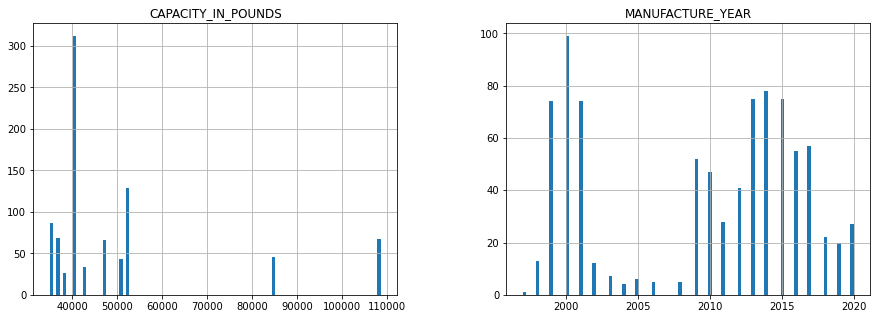

In [11]:
carrier_pd = BTS_fleet_pd[BTS_fleet_pd.CARRIER == 'AA']
carrier_pd.hist(column = ['CAPACITY_IN_POUNDS', 'MANUFACTURE_YEAR'], bins = 100, figsize = [15,5])


#### Generating Fleet Statistics Dashboards

Using the Dashboard Generator below a snapshop of fleet model, age and capacity distribution can be seen for each airline. A handy reminder of the carrier code for each airline has also been added.

In [12]:
BTS_fleetsize_pd.drop_duplicates(subset=['CARRIER'])[["CARRIER", "CARRIER_NAME"]]

,CARRIER,CARRIER_NAME
0,AA,American Airlines Inc.
92,AS,Alaska Airlines Inc.
134,B6,JetBlue Airways
166,DL,Delta Air Lines Inc.
280,F9,Frontier Airlines Inc.
300,HA,Hawaiian Airlines Inc.
316,NK,Spirit Air Lines
336,OO,SkyWest Airlines Inc.
371,UA,United Air Lines Inc.
475,WN,Southwest Airlines Co.


##### Dashboard Generator

which airline would you like to view the fleet model distribution chart for? (Please input a carrier code) OO


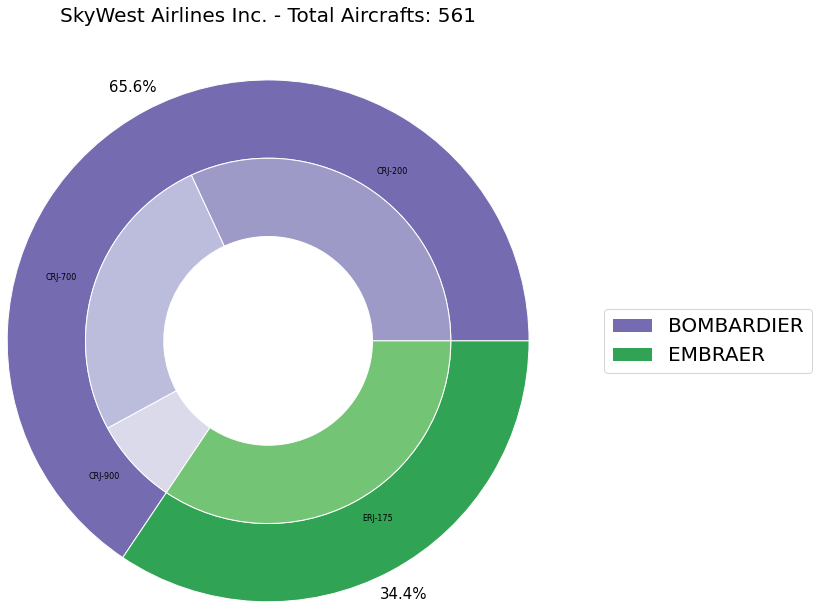

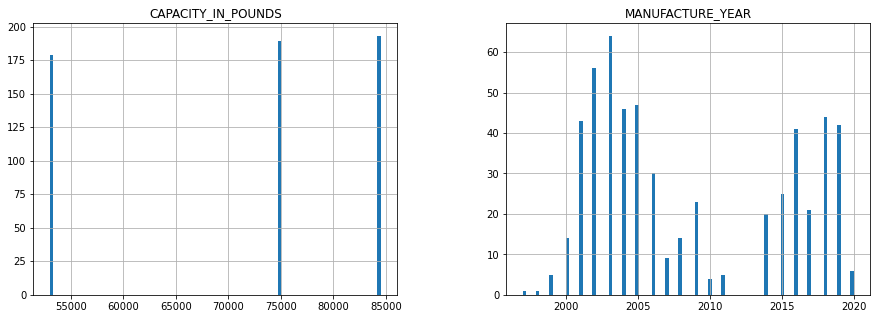

In [13]:
carr_code = input('which airline would you like to view the fleet model distribution chart for? (Please input a carrier code) ')
def dashboard (carr):  
    fleet_pie(carr)
    carrier_pd = BTS_fleet_pd[BTS_fleet_pd.CARRIER == carr]
    carrier_pd.hist(column = ['CAPACITY_IN_POUNDS', 'MANUFACTURE_YEAR'], bins = 100, figsize = [15,5])
dashboard(carr_code)

### Fleet: Analysis

#### Understanding Emissions Ranking

The fleet distribution needs to be understood with respect to the emissions of each airline. By ranking the airlines based on their emissions in the most recent year within our scope (2019) we can see trends of the highest emitters versus the lowest emitters. 

To allow for this analysis, the previously generated Emissions csv needs to be transformed to sum up all of the emmissions in 2019 and ranked. Later in the analysis the dashboards for the highest and lowest emittors will be grouped and analysed.

One variable which has a high chance of being confounding is the fleet size. It is likely that airlines with more aircraft will produce higher emissions. Whilst this would be a valid conclusion, the effect may mask more nuanced deductions such as the impact of model and brand type on emmissions. For this reason the emissions data will be joined to the total fleet data to test this hypothesis.

In [14]:
req_col = ['IATA Code', 'Airline Name', 'Year', 'CO2 Emissions (Thousands of Gallons)']
emissions_pd = pd.read_csv('Fuel-DataEmissions-Table.csv', usecols= req_col)

rec_emm = emissions_pd[emissions_pd.Year == 2019]
ranking_pd = rec_emm.groupby(['IATA Code','Airline Name','Year'],as_index = False)[["CO2 Emissions (Thousands of Gallons)"]].sum()
ranking_pd.rename(columns={"CO2 Emissions (Thousands of Gallons)": "Total Emissions 2019 (Thousands of Gallons)"}, inplace = True)

noair_pd = BTS_fleetsize_pd.groupby(['CARRIER','CARRIER_NAME'],as_index = False)[["NO. AIRCRAFTS"]].sum()
noair_pd.sort_values("NO. AIRCRAFTS", ascending = True, inplace = True)

rank_fleet_pd = pd.merge(
    ranking_pd,
    noair_pd,
    how="left",
    on=None,
    left_on= 'IATA Code',
    right_on= 'CARRIER',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=False,
    indicator=False,
    validate=None,
)
rank_fleet_pd.drop(labels = ['Year', 'CARRIER', 'CARRIER_NAME'], axis=1, inplace =True)
rank_fleet_pd['Emissions per Aircraft (Thousands of Gallons)'] = rank_fleet_pd.apply(lambda row: row['Total Emissions 2019 (Thousands of Gallons)'] / row['NO. AIRCRAFTS'],axis=1)
rank_fleet_pd = rank_fleet_pd.sort_values("Total Emissions 2019 (Thousands of Gallons)", ignore_index = True)
rank_fleet_pd

,IATA Code,Airline Name,Total Emissions 2019 (Thousands of Gallons),NO. AIRCRAFTS,Emissions per Aircraft (Thousands of Gallons)
0,OO,SkyWest Airlines,328185.90,561,585.001604
1,HA,Hawaiian Airlines,848994.30,59,14389.733898
2,F9,Frontier Airlines,908809.65,104,8738.554327
3,NK,Spirit Air Lines,1483454.70,155,9570.675484
4,AS,Alaska Airlines,2299402.35,197,11672.093147
5,B6,JetBlue Airways,2789233.65,267,10446.567978
6,WN,Southwest Airlines,6541031.70,718,9110.072006
7,UA,United Air Lines,11177708.85,782,14293.745332
8,DL,Delta Air Lines,11386805.85,750,15182.407800
9,AA,American Airlines,11528650.35,877,13145.553421


The scatter plot generated below tests the hypothesis that airlines with larger fleets produce more CO2 emissions. The chart shows a strong positive correlation suggesting that the hypothesis is correct. However, the graph also shows two outliers: Skywest Airlines and Southwest Airlines. These anomalies suggest that whilst the number of aircrafts is very indicative of the total emissions, there are further variables contributing to lower emissions.

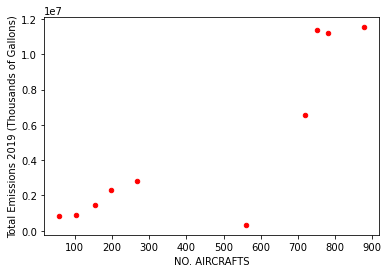

In [15]:
 emmissions_fleetsize= rank_fleet_pd.plot.scatter(x='NO. AIRCRAFTS',
                      y='Total Emissions 2019 (Thousands of Gallons)',
                      c='r')

To account for the impact of the number of aircrafts on emmissions, a second ranking based on the average emissions per aircraft has also been carried out.

In [16]:
rank_perfleet_pd = rank_fleet_pd.sort_values("Emissions per Aircraft (Thousands of Gallons)", ignore_index = True)
rank_perfleet_pd

,IATA Code,Airline Name,Total Emissions 2019 (Thousands of Gallons),NO. AIRCRAFTS,Emissions per Aircraft (Thousands of Gallons)
0,OO,SkyWest Airlines,328185.90,561,585.001604
1,F9,Frontier Airlines,908809.65,104,8738.554327
2,WN,Southwest Airlines,6541031.70,718,9110.072006
3,NK,Spirit Air Lines,1483454.70,155,9570.675484
4,B6,JetBlue Airways,2789233.65,267,10446.567978
5,AS,Alaska Airlines,2299402.35,197,11672.093147
6,AA,American Airlines,11528650.35,877,13145.553421
7,UA,United Air Lines,11177708.85,782,14293.745332
8,HA,Hawaiian Airlines,848994.30,59,14389.733898
9,DL,Delta Air Lines,11386805.85,750,15182.407800


#### Comparing the Lowest Emitters with the Highest

As previously discussed, the initial analysis has shown that a key factor in the total emissions is the number of aircrafts operating for the airline. Most of the airlines with the lowest emmissions had fewer than 200 operating aircraft, whereas many of the high emitters had over 700. This is unsurprising as it is to be expected that bigger airlines would have larger fleets, carry out more journeys and thus produce more CO2 emmissions. An exception to this trend however is SkyWest Airlines, which had the lowest emissions but a relatively high fleet (561 total aircraft).

Another trend in fleet model distribution was that the high emitters tended to have a larger percentage of Boeing Aircraft. There is a high change that this trend is mainly correlational rather than causal. Airbus is a historically european manufacturer and so it is likely that larger american airlines prefer the American company Boeing. That said with Boeing often adopting Rolls-Royce Engines whilst Airbus often preferentially selects General Electric engines, there is a chance that the emissions related to these respective engine types could be playing a role. 

When revieing the manufacture year histogram there was a slight trend in the amount of aircraft purchased in the early 2000 verses closer to 2020. Many of the low emitters had a noticable peak (or secondary peak) around 2018, and the data tended to be left skewed. Many of the higher emitting airlines showed more purchases in the early 2000s. This suggests that if more older aircraft are operating the emissions are increased. This could be because newer fleets are taking advantage of the efficiency savings and reduced emissions from newer engine models.

It should be noted that within this section the coded sections have been commented out to make the navigation of this Jupyter Notebook easier. Uncomment to view the graphs.

In [32]:
# #Uncomment to view low emitters
# ranked_emitters = []
# for airline in rank_fleet_pd['IATA Code']:
#         ranked_emitters.append(airline)
# low_emitters = ranked_emitters[0:5]
    
# for code in low_emitters:
#     dashboard(code)
    

In [31]:
# # Uncomment to view high emitters
# high_emitters = ranked_emitters[5:11]
    
# for code in high_emitters:
#     dashboard(code)

#### Analysing Airlines with Low Emissions per Aircraft

One aim of researching the fleet distribution is to identify the tenants of a sustainable airline and to see which informed decisions can lead to an airline being more environementally friendly despite its size. For this reason the top 5 airlines with the lowest emissions per aircraft have also been analysed.

One notable feature of the low emitters per aircraft set is that the fleet distribution is relatively simplistic. Few models can be seen in their fleet portfolio or in the case of southwest, a single manufacturer is used. This could suggest that lower emitters find a well performing and efficient engine and stick with it. Some of the favourite models within this set are the A320 and the B737.

One outlier in this analysis has been SkyWest Airlines which has a fleet portfolio which contrasts with the other airlines significantly. It features solely Bombardier and Embraer manufactured aircrafts, has the lowest emissions of all the airlines and still has a relatively large fleet. Upon review, SkyWest is a regional airline that mainly carries out flights within North america. It is likely that these shorter flights rather than the nature of the fleet itself has the larger impact on its emissions.

It should be noted that within this section the coded sections have been commented out to make the navigation of this Jupyter Notebook easier. Uncomment to view the graphs.

In [25]:
## Uncomment to view ranked per aircraft low emitters
# ranked_per_emitters = []
# for airline in rank_perfleet_pd['IATA Code']:
#         ranked_per_emitters.append(airline)
# low_per_emitters = ranked_per_emitters[0:5]
    
# for code in low_per_emitters:
#     dashboard(code)

### Fleet: Conclusions

The conclusions for this section of analysis have been summarised below:
#### Fleet: Methodology
* Pie Charts are a useful visualisation method to gain insight into categorical data. By nesting the data a higher density of information can be interpreted simply.
* When more categories exist in the data of the data is time dependant (such as analysis of many years) histograms are useful as they allow you to analyse skews in the data.
* Data Cleansing not only ensures the quality and validity of the output, it also simplifies the coding experience and prevents human error throughout the process.

#### Fleet and Emissions
* The larger the fleet the greater the emissions that will be produced
* Older fleets tend to lead to higher emissions
* Simple fleets with fewer models appear to produce lower emissions
* Boeing manufactured aircraft may lead to higher emissions, but this required further investigation on individual aircraft to substantiate.

## Revenue:

### Revenue: Cleaning the Dataset

Values for 2010 for Spirit Airlines have been removed because the information has not been found
revenues for Frontier Airlines were not included as data was not available 

First the csv file containing revenue and emissions for each airlines was imported using pandas

In [20]:
import pandas as pd
rev_df = pd.read_csv("Revenue_emissions.csv")
rev_df

,Airline Name,Year,Quarter,CO2 Emissions (thousands of kg),Revenue (billion of dollars $)
0,Alaska Airlines,2010,1,2.293830e+05,0.830
1,Alaska Airlines,2010,2,2.523789e+05,0.976
2,Alaska Airlines,2010,3,2.712038e+05,1.068
3,Alaska Airlines,2010,4,2.609689e+05,0.958
4,Alaska Airlines,2011,1,2.638132e+05,0.965
...,...,...,...,...,...
355,United Airlines,2018,4,2.718048e+06,10.491
356,United Airlines,2019,1,2.574775e+06,9.589
357,United Airlines,2019,2,2.914286e+06,11.402
358,United Airlines,2019,3,2.861225e+06,11.380


In [21]:
rev_df.dropna(inplace=True)
print(rev_df.shape)

(356, 5)


### Revenue: Data Visualisation and Analysis

Data Analysis was conducted to find correalations of revenue and emissions for years in the time frame from 2010 -2019 for the selected US Airlines

Then a scatter plot was used to visualise  a general relation of revenue to year for US Airlines. This plot shows a general increase in revenue for each year from 2010 to 2019.

<AxesSubplot:title={'center':'Relation of revenue to year for Alaska Airlines'}, xlabel='Year', ylabel='Revenue (billion of dollars $)'>

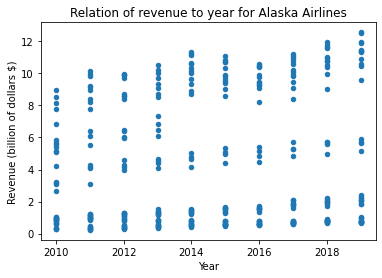

In [22]:
rev_df.plot.scatter(x='Year', y='Revenue (billion of dollars $)', title='Relation of revenue to year for Alaska Airlines')


In the next section two plots are being plotted to illustrate relationship between the emsssions and revenue data for the airlines for the given time period(excluding frontier airlines because of unavailabilty of data). The Quarterly Data will be summed up to provide data yearly.

In [23]:
# Generating a graph of yearly revenue by each airline over the 10 year period

# Group the table data by the year column, since we are looking for a yearly breakdown, then by the airlines, for this

rev_year_grouped = rev_df.groupby(['Year','Airline Name'])['Revenue (billion of dollars $)'].sum()

# Convert the data into a dataframe and reset the index columns, which assigns the emissions sum as a proper column.
rev_year_grouped = rev_year_grouped.to_frame().reset_index()

# Check that the correct data has been aggregated

print(rev_year_grouped)

# We can do the same for emisssions

emissions_year_grouped = rev_df.groupby(['Year','Airline Name'])['CO2 Emissions (thousands of kg)'].sum()
emissions_year_grouped = emissions_year_grouped.to_frame().reset_index()

print(emissions_year_grouped)

    Year        Airline Name  Revenue (billion of dollars $)
0   2010     Alaska Airlines                           3.832
1   2010   American Airlines                          22.170
2   2010     Delta Air Lines                          31.755
3   2010   Hawaiian Airlines                           1.310
4   2010     JetBlue Airways                           3.779
..   ...                 ...                             ...
84  2019     JetBlue Airways                           8.094
85  2019     SkyWest Airline                           2.972
86  2019  Southwest Airlines                          22.428
87  2019     Spirit Airlines                           3.831
88  2019     United Airlines                          43.259

[89 rows x 3 columns]
    Year        Airline Name  CO2 Emissions (thousands of kg)
0   2010     Alaska Airlines                     1.013935e+06
1   2010   American Airlines                     7.889961e+06
2   2010     Delta Air Lines                     9.789428e+

Now since we have the data in the order we need them. Two plots can be constructed for emissions data and revenue data for each year for the selected airlines.

Text(0, 0.5, 'CO2 Emissions (thousands of kg)')

<Figure size 432x288 with 0 Axes>

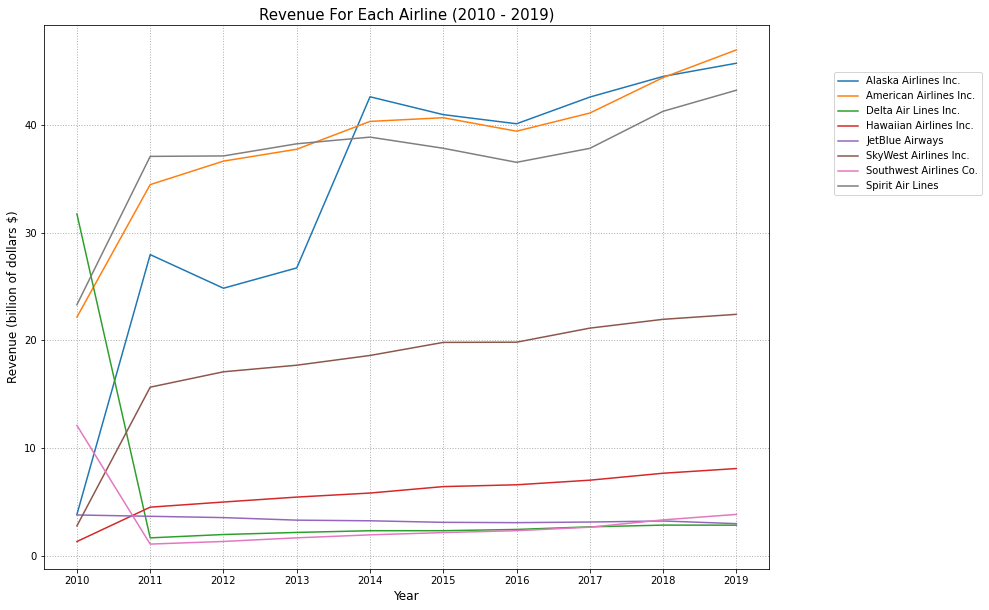

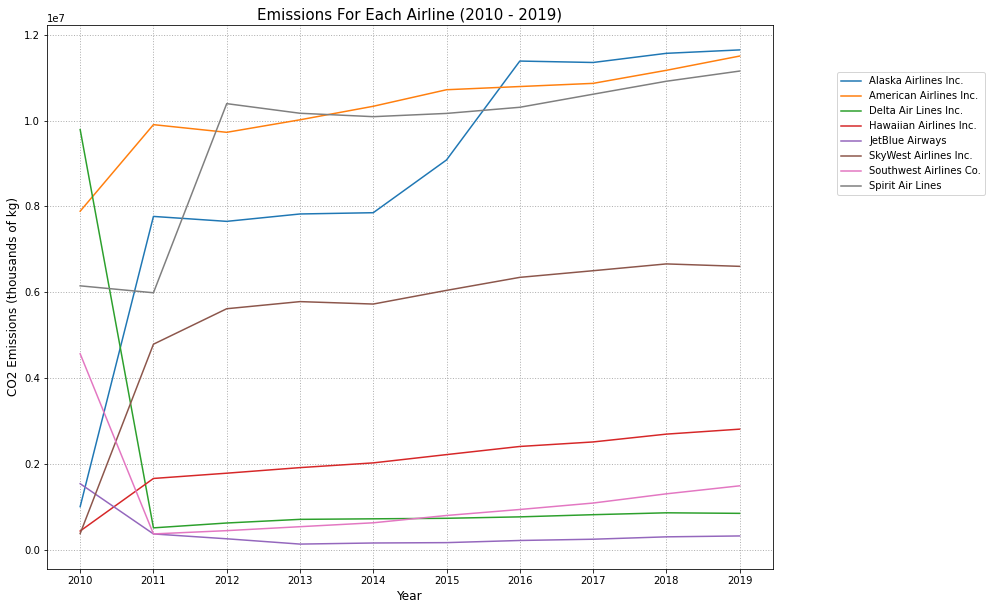

In [30]:
# Plotting the transformed data for revenue data
# Frontier airlines has not been considered because of missing data
plt.figure(1)
x = rev_year_grouped['Year'].unique().tolist()
y = rev_year_grouped['Revenue (billion of dollars $)'].tolist()
labels = ['Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 
          'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines',
          'United Air Lines Inc.']

plt.figure(figsize=(13,10))

plt.plot(x, y[0:89:9], label = labels[0])
plt.plot(x, y[1:89:9], label = labels[1])
plt.plot(x, y[2:89:9], label = labels[2])
plt.plot(x, y[3:89:9], label = labels[3])
plt.plot(x, y[4:89:9], label = labels[4])
plt.plot(x, y[5:89:9], label = labels[5])
plt.plot(x, y[6:89:9], label = labels[6])
plt.plot(x, y[7:89:9], label = labels[7])
#plt.plot(x, y[8:90:9], label = labels[8])



plt.legend(loc='center right', bbox_to_anchor=(1.3,0.8))
plt.xticks(x)
plt.grid(linewidth = 1, linestyle = 'dotted')

plt.title('Revenue For Each Airline (2010 - 2019)', size = 15)
plt.xlabel('Year', size = 12)
plt.ylabel('Revenue (billion of dollars $)', size = 12)

# Plotting the transformed data for emmisions data
# Here Frontier airlines has not been considered 
plt.figure(2)
x = emissions_year_grouped['Year'].unique().tolist()
y = emissions_year_grouped['CO2 Emissions (thousands of kg)'].tolist()
labels = ['Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 
          'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines',
          'United Air Lines Inc.']

plt.figure(figsize=(13,10))

plt.plot(x, y[0:89:9], label = labels[0])
plt.plot(x, y[1:89:9], label = labels[1])
plt.plot(x, y[2:89:9], label = labels[2])
plt.plot(x, y[3:89:9], label = labels[3])
plt.plot(x, y[4:89:9], label = labels[4])
plt.plot(x, y[5:89:9], label = labels[5])
plt.plot(x, y[6:89:9], label = labels[6])
plt.plot(x, y[7:89:9], label = labels[7])
#plt.plot(x, y[8:90:9], label = labels[8])



plt.legend(loc='center right', bbox_to_anchor=(1.3,0.8))
plt.xticks(x)
plt.grid(linewidth = 1, linestyle = 'dotted')

plt.title('Emissions For Each Airline (2010 - 2019)', size = 15)
plt.xlabel('Year', size = 12)
plt.ylabel('CO2 Emissions (thousands of kg)', size = 12)

#### Revenue: Interpretation

It can be concluded from this representation that higher the revenue, higher the emmissions. The revenue and emmissions data show a general increase from 2010 to 2019.


### Revenue: Individual Airline

We can also aggregate the data to have only data for a single airline and look at trends in revenue in the time frame between 2010 and 2019. The following analysis has been done to show the trend in revenue for Alaska airlines from 2010 to 2019.

In [ ]:
revenues_alaska = rev_df[rev_df['Airline Name'] == 'Alaska Airlines']
revenues_alaska


In [ ]:
revenues_alaska.plot.scatter(x='Year', y='Revenue (billion of dollars $)', title='Relation of revenue to year for Alaska Airlines')


#### Revenue: Interpretation

There is a general increase in revenue for Alaska Airlines from 2010 - 2019

## Ticket Price: